In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Data Loading

In [8]:
mydata = pd.read_csv('챌린저_마스터_그마데이터(13_KR).csv')

In [9]:
mydata = mydata[mydata['gameMode'] == 'CLASSIC']

drop_ls = ['gameId',
           'queueId',
           'platformId',
           'gameCreation',
           'mapId',
           'gameMode',
           'teamId_blue',
           'teamId_red',
        'seasonId',
        'gameVersion',
          'gameType',
          'teams',
          'participants',
           'participantIdentities',
           'bans_blue',
           'bans_red']
           
           
mydata.drop(columns=drop_ls, inplace=True)
print('Data shape :', mydata.shape)

Data shape : (19928, 206)


In [10]:
mydata

,gameDuration,win_blue,firstBlood_blue,firstTower_blue,firstInhibitor_blue,firstBaron_blue,firstDragon_blue,firstRiftHerald_blue,towerKills_blue,inhibitorKills_blue,...,perk4Var3_red,perk5_red,perk5Var1_red,perk5Var2_red,perk5Var3_red,perkPrimaryStyle_red,perkSubStyle_red,statPerk0_red,statPerk1_red,statPerk2_red
0,1264.0,Fail,False,False,False,False,False,False,0,0,...,0.0,33345.0,1442.0,1227.0,756.0,32400.0,33200.0,20023.0,20026.0,20009.0
1,1739.0,Win,False,False,True,True,False,False,9,2,...,911.0,33216.0,2430.0,10.0,0.0,32500.0,33100.0,20025.0,20026.0,20010.0
2,1339.0,Win,True,True,True,True,True,True,8,1,...,0.0,32721.0,7190.0,11.0,0.0,32600.0,32600.0,20029.0,20032.0,20008.0
3,2341.0,Win,True,True,True,True,False,True,11,5,...,0.0,33875.0,3980.0,35.0,0.0,32600.0,32700.0,20020.0,20026.0,20007.0
4,1479.0,Win,True,True,True,False,False,True,10,2,...,0.0,32907.0,644.0,10.0,0.0,32500.0,32800.0,20025.0,20026.0,20008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22223,1623.0,Win,False,False,True,False,True,False,6,1,...,5.0,32841.0,7281.0,5.0,0.0,32300.0,32700.0,20029.0,20032.0,20011.0
22224,1739.0,Win,False,False,True,True,False,False,7,1,...,0.0,32585.0,574.0,0.0,0.0,32500.0,32500.0,20026.0,20032.0,20009.0
22225,1418.0,Fail,False,False,False,False,False,True,0,0,...,0.0,33089.0,416.0,5.0,0.0,32000.0,32900.0,20026.0,20032.0,20010.0
22226,901.0,Fail,False,False,False,False,False,False,0,0,...,0.0,33195.0,3978.0,50.0,0.0,32300.0,33000.0,20023.0,20032.0,20008.0


## Data Preprocessing

## EDA

In [8]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(x.values)

output['pca-one'] = pca_result[:,0]
output['pca-two'] = pca_result[:,1] 
output['pca-three'] = pca_result[:,2]


expl_var_ratio = pca.explained_variance_ratio_

print('Explained variation per principal component: {}'.format(expl_var_ratio))

np.cumsum(expl_var_ratio)

Explained variation per principal component: [0.2297656  0.13863368 0.08348863 0.08015617 0.04761877 0.03983625
 0.03180308 0.02348959 0.02137912 0.01549961 0.01441243 0.01385783
 0.01279518 0.01103232 0.01079188 0.00865953 0.00833869 0.00809462
 0.0080442  0.0066358  0.00626041 0.00594127 0.00579264 0.00548151
 0.00525432 0.00521193 0.00488673 0.00467237 0.00443489 0.00434752
 0.00416839 0.00402995 0.00399427 0.00378605 0.0037187  0.00364432
 0.00352344 0.0033491  0.00307734 0.00289784 0.00285031 0.00273285
 0.00258519 0.00251179 0.00241898 0.00232279 0.00225183 0.0022341
 0.00220482 0.00210774]


array([0.2297656 , 0.36839928, 0.45188791, 0.53204407, 0.57966285,
       0.6194991 , 0.65130218, 0.67479177, 0.69617089, 0.7116705 ,
       0.72608293, 0.73994076, 0.75273594, 0.76376826, 0.77456015,
       0.78321968, 0.79155836, 0.79965298, 0.80769718, 0.81433298,
       0.8205934 , 0.82653467, 0.83232731, 0.83780882, 0.84306314,
       0.84827507, 0.85316179, 0.85783417, 0.86226906, 0.86661658,
       0.87078497, 0.87481492, 0.87880919, 0.88259524, 0.88631395,
       0.88995827, 0.89348171, 0.89683081, 0.89990816, 0.902806  ,
       0.90565631, 0.90838915, 0.91097435, 0.91348614, 0.91590511,
       0.9182279 , 0.92047973, 0.92271383, 0.92491865, 0.92702639])

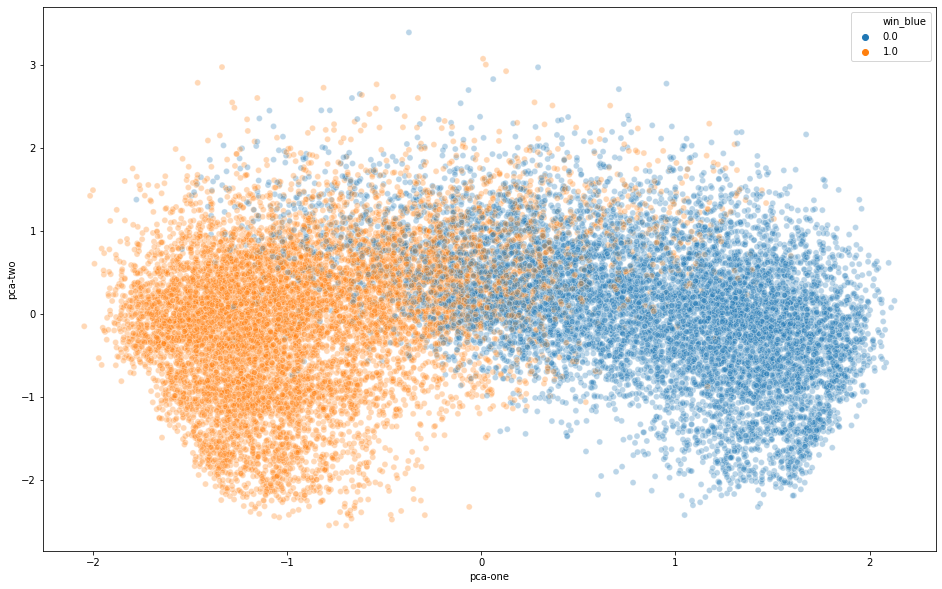

In [9]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="win_blue",
    data=output,
    legend="full",
    alpha=0.3)

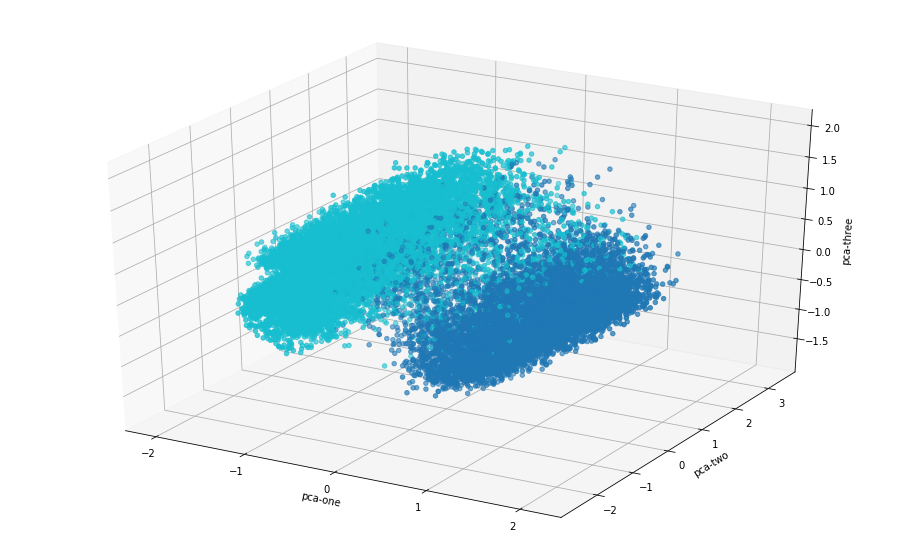

In [10]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=output["pca-one"], 
    ys=output["pca-two"], 
    zs=output["pca-three"], 
    c=output["win_blue"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [11]:
pca2 = PCA(n_components=3)
pca2.fit_transform(x.values)
loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=x.columns)

In [12]:
print(loading_matrix.sort_values(by='PC1')[:10])
print(loading_matrix.sort_values(by='PC1', ascending=False)[:10])

                                PC1       PC2       PC3
firstInhibitor_blue       -0.421355 -0.021471  0.200047
firstTower_blue           -0.361385 -0.020133 -0.192859
firstInhibitorKill_blue   -0.289858  0.015107  0.206656
firstRiftHerald_blue      -0.287518 -0.004501 -0.284302
firstTowerKill_blue       -0.279764 -0.017272 -0.193949
towerKills_blue           -0.261766  0.071260  0.080732
riftHeraldKills_blue      -0.254576  0.029314 -0.173077
firstBaron_blue           -0.209766  0.184374  0.177295
firstInhibitorAssist_blue -0.197804 -0.022136  0.107425
firstBlood_blue           -0.183887 -0.015892 -0.133992
                                          PC1       PC2       PC3
towerKills_red                       0.254126  0.104812 -0.091233
riftHeraldKills_red                  0.238422  0.030635  0.159155
turretKills_red                      0.173221  0.065426 -0.058460
dragonKills_red                      0.103227  0.105036 -0.052136
damageDealtToObjectives_red          0.103223  0.09594

In [13]:
print(loading_matrix.sort_values(by='PC2')[:10])
print(loading_matrix.sort_values(by='PC2', ascending=False)[:10])

                                PC1       PC2       PC3
firstInhibitorAssist_blue -0.197804 -0.022136  0.107425
firstInhibitor_blue       -0.421355 -0.021471  0.200047
firstTower_blue           -0.361385 -0.020133 -0.192859
firstTowerKill_blue       -0.279764 -0.017272 -0.193949
firstBlood_blue           -0.183887 -0.015892 -0.133992
firstBloodKill_blue       -0.160216 -0.015434 -0.128171
firstDragon_blue          -0.155427 -0.010399  0.078350
firstTowerAssist_blue     -0.052083 -0.008741 -0.031685
firstRiftHerald_blue      -0.287518 -0.004501 -0.284302
perk2_blue                -0.001742 -0.003496 -0.000702
                                       PC1       PC2       PC3
firstBaron_blue                  -0.209766  0.184374  0.177295
champLevel_red                    0.028623  0.139979 -0.021833
champLevel_blue                  -0.031474  0.138604  0.005809
gameDuration                     -0.006602  0.132502 -0.004701
goldEarned_red                    0.038649  0.128780 -0.019704
goldEa

In [14]:
print(loading_matrix.sort_values(by='PC3')[:10])
print(loading_matrix.sort_values(by='PC3', ascending=False)[:10])

                           PC1       PC2       PC3
firstRiftHerald_blue -0.287518 -0.004501 -0.284302
firstTowerKill_blue  -0.279764 -0.017272 -0.193949
firstTower_blue      -0.361385 -0.020133 -0.192859
riftHeraldKills_blue -0.254576  0.029314 -0.173077
firstBlood_blue      -0.183887 -0.015892 -0.133992
firstBloodKill_blue  -0.160216 -0.015434 -0.128171
towerKills_red        0.254126  0.104812 -0.091233
turretKills_red       0.173221  0.065426 -0.058460
dragonKills_red       0.103227  0.105036 -0.052136
baronKills_red        0.053526  0.071978 -0.050841
                                PC1       PC2       PC3
firstInhibitorKill_blue   -0.289858  0.015107  0.206656
firstInhibitor_blue       -0.421355 -0.021471  0.200047
firstBaron_blue           -0.209766  0.184374  0.177295
riftHeraldKills_red        0.238422  0.030635  0.159155
firstInhibitorAssist_blue -0.197804 -0.022136  0.107425
towerKills_blue           -0.261766  0.071260  0.080732
firstDragon_blue          -0.155427 -0.010399  

## Modeling

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

/home/jaewon.jung.conda/anaconda3/envs/tf1.15/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Feature importance

In [18]:
coef_ser = pd.Series(clf.coef_.flatten(), index=x_train.columns)

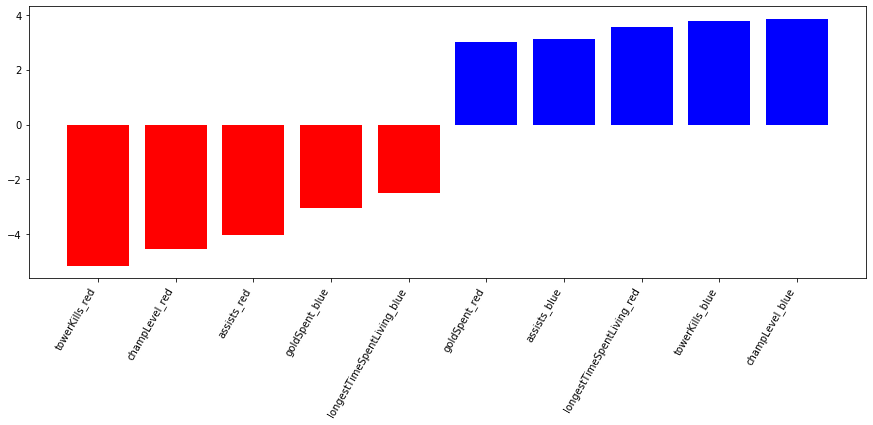

In [19]:
def plot_coefficients(classifier, feature_names, top_features=5):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 0 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

plot_coefficients(clf, x_train.columns)

In [22]:
print(coef_ser.sort_values(ascending=False)[:10])

champLevel_blue                        3.857179
towerKills_blue                        3.775758
longestTimeSpentLiving_red             3.561020
assists_blue                           3.102356
goldSpent_red                          3.001052
deaths_red                             2.263547
inhibitorKills_blue                    1.678253
neutralMinionsKilledEnemyJungle_red    1.528595
visionScore_red                        1.513949
baronKills_blue                        1.268669
dtype: float64


In [23]:
print(coef_ser.sort_values(ascending=True)[:10])

towerKills_red                -5.151212
champLevel_red                -4.546104
assists_red                   -4.026635
goldSpent_blue                -3.042220
longestTimeSpentLiving_blue   -2.497834
goldEarned_red                -2.033635
inhibitorKills_red            -1.488576
timeCCingOthers_blue          -1.432052
deaths_blue                   -1.376604
kills_red                     -1.089285
dtype: float64


# Evaluation

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.990801137313932


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2930
         1.0       0.99      0.99      0.99      3049

    accuracy                           0.99      5979
   macro avg       0.99      0.99      0.99      5979
weighted avg       0.99      0.99      0.99      5979



In [26]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[2902   28]
 [  27 3022]]
